# **NTSB Aviation Data Analysis**

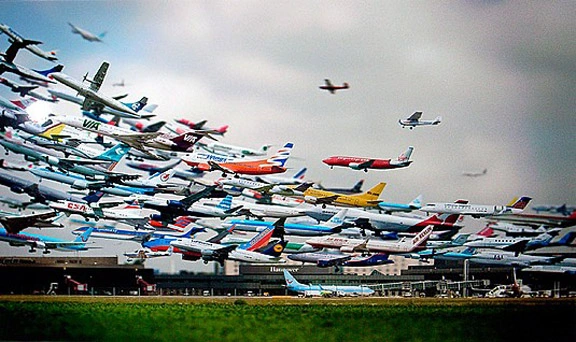

## **Overview**

This project analyzes which aircrafts have the lowest risk for Peanut Butter INC. to enter the commercial and private enterprises industry. We are making our recommendation based on 90,000 incident records over the past 70 years.

## **Business Problem**

Peanut Butter Inc is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commerical and private enterprises, but do not know anything about the potential risks of aircraft. We will be analyzing the NTSB Aviation Accident data to determine which aircraft and operation location are the lowest risk for Peanut Butter Inc to start this new business endeavor in the United States
    
We will define the Lowest Risk aircraft to be those with the lowest loss of life 

We will use this analysis to recommend:
- 1.) Make and Model of Commercial Airplane
- 2.) Make and Model of Private Aircraft 
- 3.) and the risk associated with each of our regions

# **Data Understanding**

In the data folder is a dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

## **Importing Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from geopy.geocoders import Nominatim

## **Importing Project Data**

In [2]:
df = pd.read_csv('data/Aviation_Data.csv', encoding='latin-1', low_memory=False)

Checking:

- .head()
- .tail()
- .info()

In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## **Data Preparation**

### **Data Cleaning**

We will start with making the column values and the column names a little easier to work with and then selecting then we will selecting the columns we will need

In [6]:
# Clean column names, replacing . to _ and making them lowercase
df = df.rename(columns={c: c.lower().replace('.', '_') for c in df.columns})

# Fortmating all object columns lowercase
df['make'] = df['make'].str.lower()
df['model'] = df['model'].str.lower()
df['location'] = df['location'].str.lower()
df['investigation_type'] = df['investigation_type'].str.lower()
df['country'] = df['country'].str.lower()
df['injury_severity'] = df['injury_severity'].str.lower()
df['aircraft_category'] = df['aircraft_category'].str.lower()
df['engine_type'] = df['engine_type'].str.lower()
df['amateur_built'] = df['amateur_built'].str.lower()

#dropping the columns we will not be using
df = df[['location','investigation_type','event_date','country',
         'injury_severity','aircraft_category','make',
         'model','number_of_engines','engine_type','total_fatal_injuries',
         'total_uninjured','total_serious_injuries','total_minor_injuries',
         'latitude','longitude','amateur_built','aircraft_damage']]

# Convert event_date column to datetime format
df['event_date'] = pd.to_datetime(df['event_date'])

# We will be looking at data from 2001 to 2022
df = df[df['event_date'] > '2001-11-19']

# Creating a new dataframe with data from the US
df = df[df['country'] == 'united states']

# Split location column into city and state columns + Cleaning format
df[['city', 'state']] = df['location'].str.split(', ', n=1, expand=True)
df['city'] = df['city'].str.lower()
df['state'] = df['state'].str.lower()

# Droping 7 missing null values in location
df.dropna(subset=['location'], inplace=True)

# populating injury_severity based on fatalities =/or/!= 0
df.loc[(df['total_fatal_injuries'] == 0) & (df['injury_severity'].isna()), 'injury_severity'] = 'non-fatal'
df.loc[(df['total_fatal_injuries'] != 0) & (df['injury_severity'].isna()), 'injury_severity'] = 'fatal'

# Cleaning amateur_built formatting + filtering to NOT amateur built
df = df[df['amateur_built'] == 'no']

# Droping 9 missing values in Make/Model + cleaning data
df.dropna(subset=['make'], inplace=True)
df.dropna(subset=['model'], inplace=True)

# Adding placeholder in 'state' for missing values = 'unknown' 
df['state'] = df['state'].fillna('Unknown')

# Dropping 883 missing values in number_of_engines + number_of_engines >= 1
df.dropna(subset=['number_of_engines'], inplace=True)
df = df[df['number_of_engines'] >= 1]

# Cleaning 'aircraft_category' with null values
engine_types = ['reciprocating', 'turbo prop', 'turbo fan', 'turbo jet']
df.loc[(df['aircraft_category'].isnull()) & (df['engine_type'].isin(engine_types)), 'aircraft_category'] = 'airplane'

# Dropping everything except 'Airplane' in engine_type
df.loc[~df['engine_type'].isin(engine_types), 'engine_type'] = np.nan
df.dropna(subset=['engine_type'], inplace=True)

# Filling missing value in total_fatal_injuries, total_serious_injuries, and total_minor_injuries
df['total_fatal_injuries'] = df['total_fatal_injuries'].fillna(0)
df['total_serious_injuries'] = df['total_serious_injuries'].fillna(0)
df['total_minor_injuries'] = df['total_minor_injuries'].fillna(0)
df['total_uninjured'] = df['total_minor_injuries'].fillna(0)

In [7]:
#Creating a dictionary of state abbreviation and their corresponding region with all lower case values
state_region_dict = {'ct': 'North East', 'de': 'North East', 'me': 'North East', 'md': 'North East', 'ma': 'North East', 'nh': 'North East','nj': 'North East', 'ny': 'North East', 'pa': 'North East', 'ri': 'North East', 'vt': 'North East',
                     'il': 'Midwest', 'in': 'Midwest', 'ia': 'Midwest', 'ks': 'Midwest', 'mi': 'Midwest', 'mn': 'Midwest',
                     'mo': 'Midwest', 'ne': 'Midwest', 'nd': 'Midwest', 'oh': 'Midwest', 'sd': 'Midwest', 'wi': 'Midwest',
                     'al': 'South', 'ar': 'South', 'fl': 'South', 'ga': 'South', 'ky': 'South', 'la': 'South', 'ms': 'South',
                     'nc': 'South', 'ok': 'South', 'sc': 'South', 'tn': 'South', 'tx': 'South', 'va': 'South', 'wv': 'South',
                     'ak': 'West', 'az': 'West', 'ca': 'West', 'co': 'West', 'hi': 'West', 'id': 'West', 'mt': 'West', 'nv': 'West', 'nm': 'West', 'or': 'West', 'ut': 'West', 'wa': 'West', 'wy': 'West'}

# Add a new column 'region' to the dataframe and map the state to its corresponding region
df['region'] = df['state'].map(state_region_dict)

#### **Missing Values**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23335 entries, 51802 to 90226
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   location                23335 non-null  object        
 1   investigation_type      23335 non-null  object        
 2   event_date              23335 non-null  datetime64[ns]
 3   country                 23335 non-null  object        
 4   injury_severity         23335 non-null  object        
 5   aircraft_category       23335 non-null  object        
 6   make                    23335 non-null  object        
 7   model                   23335 non-null  object        
 8   number_of_engines       23335 non-null  float64       
 9   engine_type             23335 non-null  object        
 10  total_fatal_injuries    23335 non-null  float64       
 11  total_uninjured         23335 non-null  float64       
 12  total_serious_injuries  23335 non-null  fl

---

## **Private Plane Risk Assessment**

The first portion of the analysis will focus on private planes. We define a private plane as one which carries less than 20 passengers total. Private planes generally have either 1 or 2 engines. Our goal will be to determine the safest make and model of private planes, as well as whether it is safer to have 1 or 2 engines.

We will add the sum of all total injury columns and uninjured columns to calculate total number of passangers per plane. this will allow us to distingush between private and commerical

In [9]:
df['passengers'] = df['total_uninjured']+df['total_minor_injuries']+df['total_serious_injuries']+df['total_fatal_injuries']

In [10]:
private_planes = df.loc[df['passengers'] <20]

We now have a subset of the data that focuses on planes estimated to be carrying less than 20 passengers. We will examine the distributions of make and model to determine what recommendations should be made.

### **Visualization**

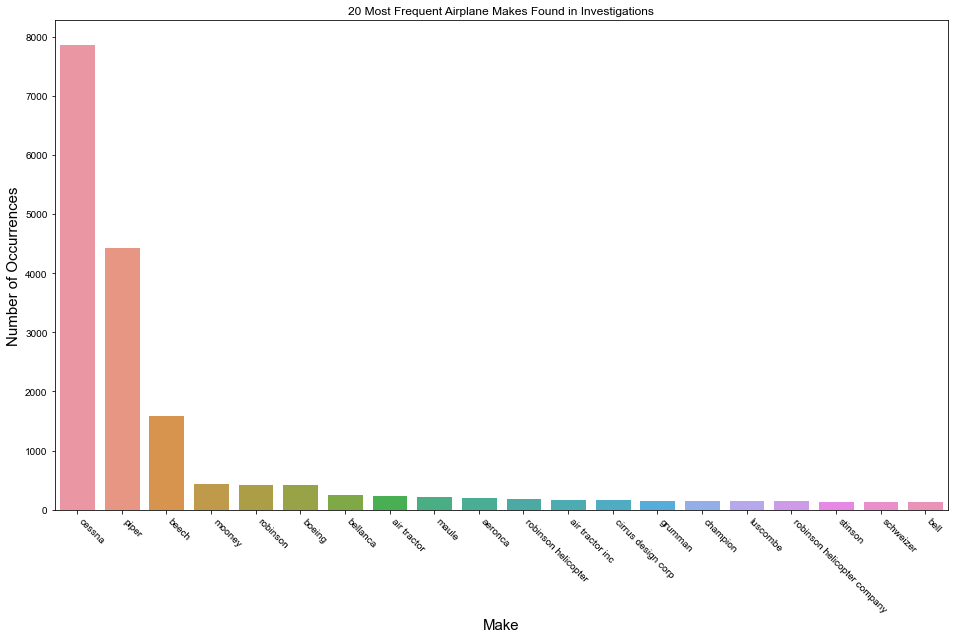

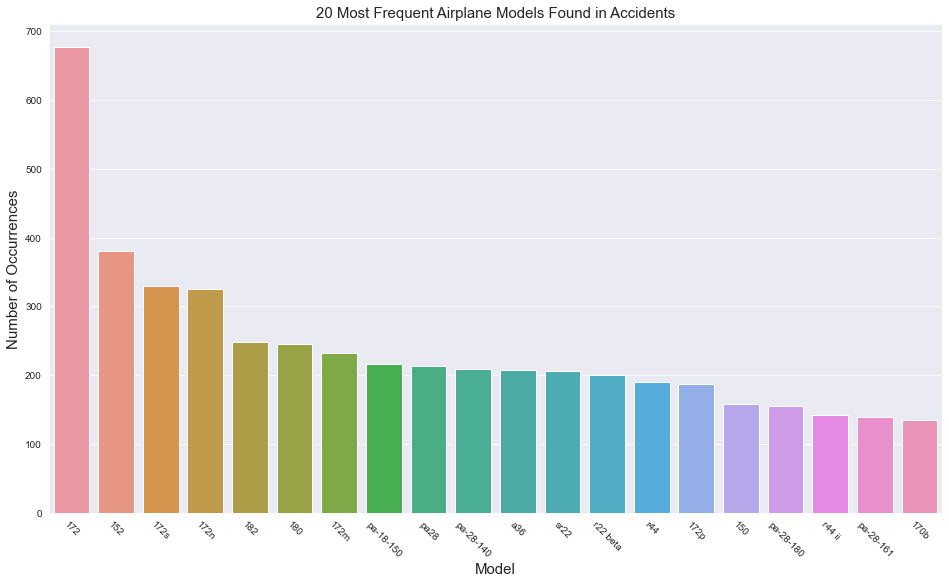

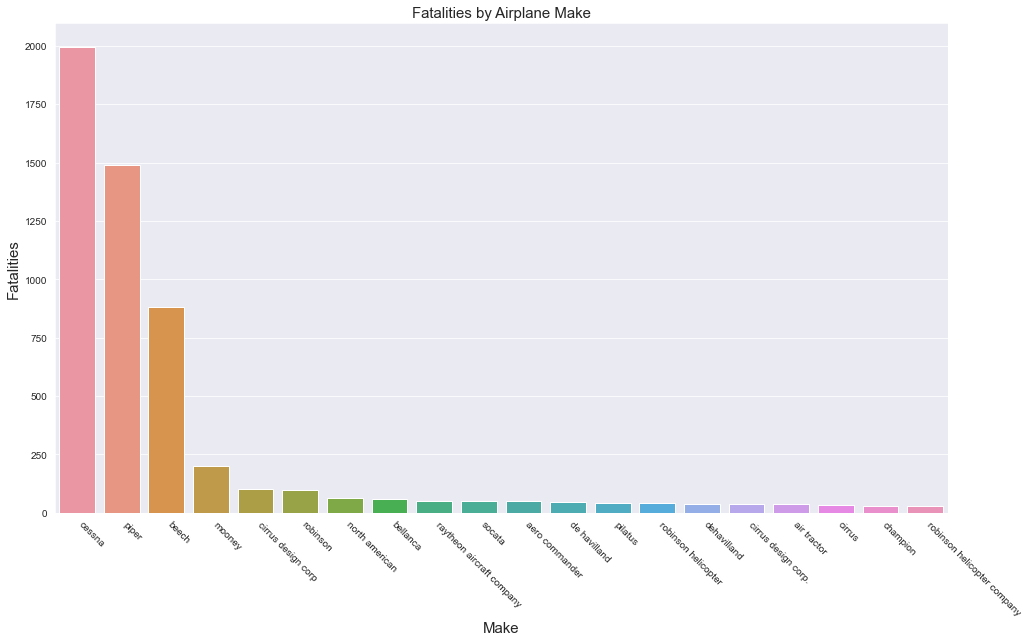

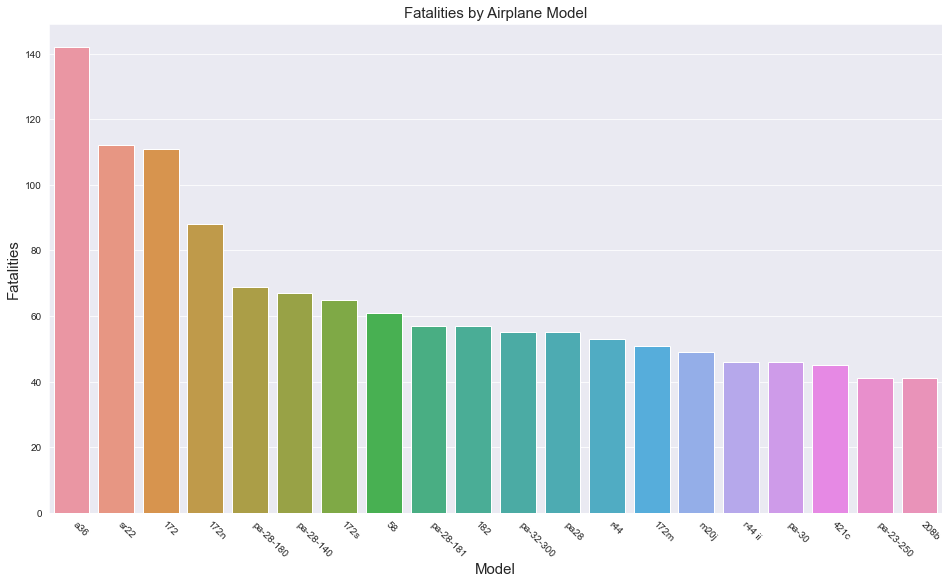

In [11]:
#Create plot to show 20 most frequent airplane makes found in investigations
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
makes=sns.barplot(data=private_planes, x=private_planes['make'].value_counts().index[:20], y=private_planes['make'].value_counts().values[:20])
makes.set_title('20 Most Frequent Airplane Makes Found in Investigations')
makes.set_xlabel('Make', fontsize=15)
makes.set_ylabel('Number of Occurrences', fontsize=15)
makes.set_xticklabels(private_planes['make'].value_counts().index[:20], rotation=-45, ha='left');

#Create plot to show 20 most frequent airplane models found in accidents
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
makes=sns.barplot(data=private_planes, x=private_planes['model'].value_counts().index[:20], y=private_planes['model'].value_counts().values[:20])
makes.set_title('20 Most Frequent Airplane Models Found in Accidents', fontsize=15)
makes.set_xlabel('Model', fontsize=15)
makes.set_ylabel('Number of Occurrences', fontsize=15)
makes.set_xticklabels(private_planes['model'].value_counts().index[:20], rotation=-45, ha='center');

#Fatalities by Airplane Make
fatalities=private_planes.groupby('make')['total_fatal_injuries'].sum().sort_values(ascending=False)
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
f=sns.barplot(data=private_planes, x=fatalities.index[:20], y=fatalities.values[:20])
f.set_title('Fatalities by Airplane Make', fontsize=15)
f.set_xlabel('Make', fontsize=15)
f.set_ylabel('Fatalities', fontsize=15)
f.set_xticklabels(fatalities.index[:20], rotation=-45, ha='left');

#Fatalities by Airplane Model
fatalities=private_planes.groupby('model')['total_fatal_injuries'].sum().sort_values(ascending=False)
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
f=sns.barplot(data=private_planes, x=fatalities.index[:20], y=fatalities.values[:20])
f.set_title('Fatalities by Airplane Model', fontsize=15)
f.set_xlabel('Model', fontsize=15)
f.set_ylabel('Fatalities', fontsize=15)
f.set_xticklabels(fatalities.index[:20], rotation=-45, ha='left');

We can see that although Cessna has nearly twice as many investigations as Piper, the difference in fatalities is less stark. As for models, the 172 was the most common model investigated but accounted for only the 3rd most deaths. The A36 model accounted for the most fatalities, despite being only the 9th most common model involved in investigations.

Ultimately a plane cannot be several types of makes and models -it can only be one. Therefore the next step in our analysis will be to combine make and model into one column, and use this column to make our final recommendations. Specifically, we will look to see which models have the lowest percentage of deaths and injuries out of their total passengers.

We will look at all planes which flew more than 100 passengers total (to ensure we have a significant sample size). This comes out to 91 total make/models. From these 91 we will select those which tend to be the safest. The strategy will be to examine the lowest 20 death rates, lowest 20 serious injury rates, and lowest 20 minor injury rates, and then see which planes appear in all 3. We will also see which of those planes tended to have less damage to the aircraft.

In [12]:
private_planes['plane']=private_planes['make'].str[0:] + ' ' + private_planes['model'].str[0:]

most_common_private_planes=private_planes.groupby('plane')['passengers'].sum().sort_values(ascending=False)[private_planes.groupby('plane')['passengers'].sum().sort_values(ascending=False).values>100]
top_private_planes=private_planes.loc[private_planes['plane'].isin(most_common_private_planes.index)]

death_rates=top_private_planes.groupby('plane')['total_fatal_injuries'].sum()/top_private_planes.groupby('plane')['passengers'].sum()
death_rates=death_rates.sort_values(ascending=False)

serious_injury_rates=top_private_planes.groupby('plane')['total_serious_injuries'].sum()/top_private_planes.groupby('plane')['passengers'].sum()
serious_injury_rates=serious_injury_rates.sort_values(ascending=False)

minor_injury_rates=top_private_planes.groupby('plane')['total_minor_injuries'].sum()/top_private_planes.groupby('plane')['passengers'].sum()
minor_injury_rates=serious_injury_rates.sort_values(ascending=False)

<ipython-input-12-6b9d0962fa43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  private_planes['plane']=private_planes['make'].str[0:] + ' ' + private_planes['model'].str[0:]


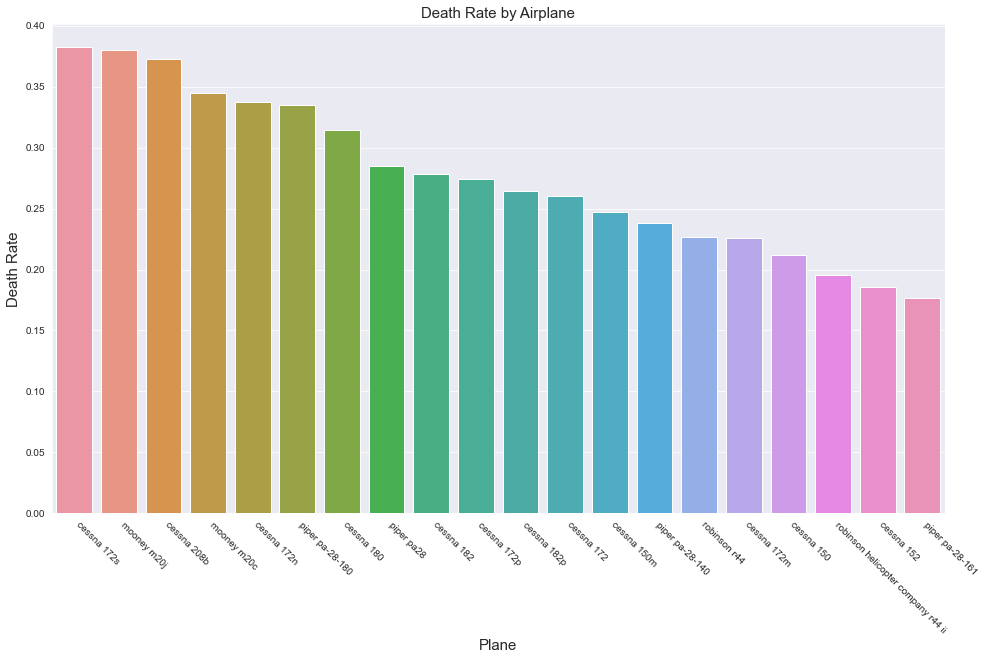

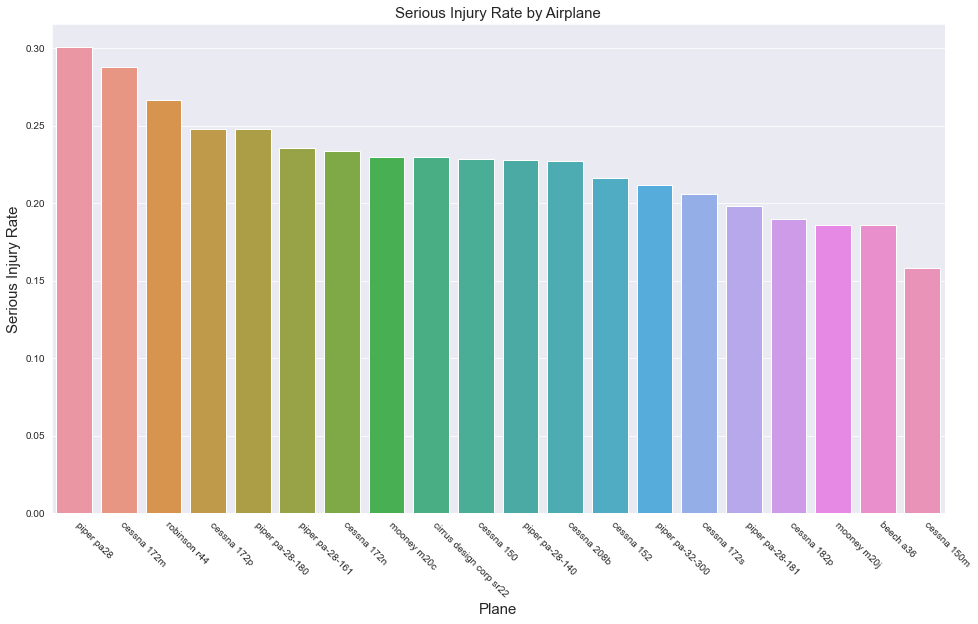

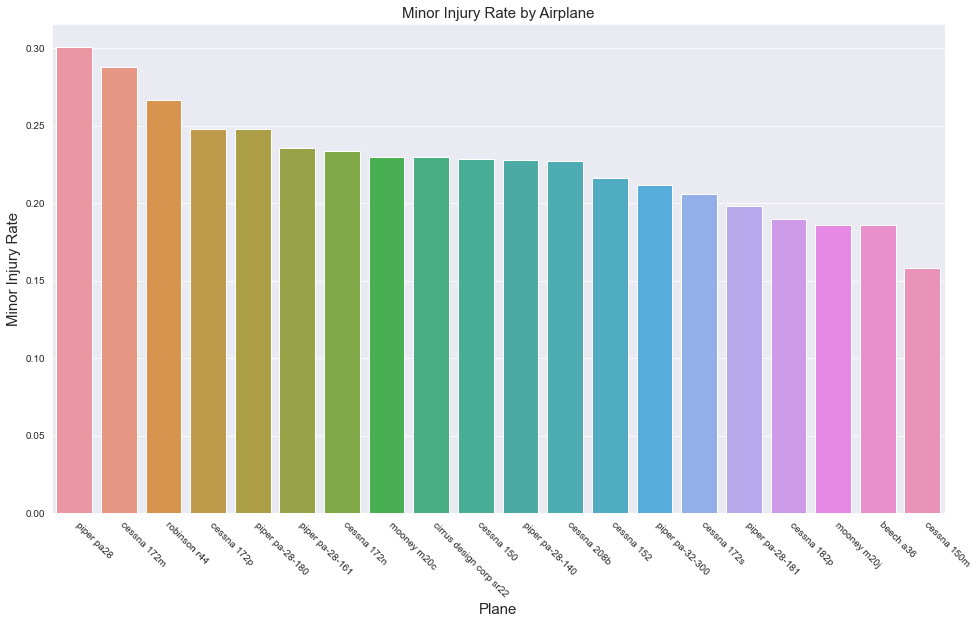

In [13]:
#Viewing lowest death rates by airplane make/model
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
f=sns.barplot(data=top_private_planes, x=death_rates.index[-20:], y=death_rates.values[-20:])
f.set_title('Death Rate by Airplane', fontsize=15)
f.set_xlabel('Plane', fontsize=15)
f.set_ylabel('Death Rate', fontsize=15)
f.set_xticklabels(death_rates.index[-20:], rotation=-45, ha='left');

#Viewing lowest injury rates by airplane make/model
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
f=sns.barplot(data=top_private_planes, x=serious_injury_rates.index[-20:], y=serious_injury_rates.values[-20:])
f.set_title('Serious Injury Rate by Airplane', fontsize=15)
f.set_xlabel('Plane', fontsize=15)
f.set_ylabel('Serious Injury Rate', fontsize=15)
f.set_xticklabels(serious_injury_rates.index[-20:], rotation=-45, ha='left');

#Viewing minor injury rates by airplane make/model
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
f=sns.barplot(data=top_private_planes, x=minor_injury_rates.index[-20:], y=minor_injury_rates.values[-20:])
f.set_title('Minor Injury Rate by Airplane', fontsize=15)
f.set_xlabel('Plane', fontsize=15)
f.set_ylabel('Minor Injury Rate', fontsize=15)
f.set_xticklabels(minor_injury_rates.index[-20:], rotation=-45, ha='left');

Next we will look at the breakdown of damage to the airplane. We will create binary columns to represent the level of damage.

In [14]:
top_private_planes['aircraft_damage'].value_counts()

Substantial    4206
Destroyed       405
Minor            42
Unknown           1
Name: aircraft_damage, dtype: int64

In [15]:
top_private_planes['substantial']=top_private_planes['aircraft_damage'].apply(lambda x: 1 if x=='Substantial' else 0)
top_private_planes['destroyed']=top_private_planes['aircraft_damage'].apply(lambda x: 1 if x=='Destroyed' else 0)
top_private_planes['minor']=top_private_planes['aircraft_damage'].apply(lambda x: 1 if x=='Minor' else 0)

substantial_damage=top_private_planes.groupby('plane')['substantial'].sum()
destroyed=top_private_planes.groupby('plane')['destroyed'].sum().sort_values(ascending=False)
minor_damage=top_private_planes.groupby('plane')['minor'].sum().sort_values(ascending=False)

<ipython-input-15-6a88e5b54d33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_private_planes['substantial']=top_private_planes['aircraft_damage'].apply(lambda x: 1 if x=='Substantial' else 0)
<ipython-input-15-6a88e5b54d33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_private_planes['destroyed']=top_private_planes['aircraft_damage'].apply(lambda x: 1 if x=='Destroyed' else 0)
<ipython-input-15-6a88e5b54d33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [16]:
minor_damage_table=pd.merge(minor_damage, top_private_planes['plane'].value_counts(), left_index=True, right_index=True)
substantial_damage_table=pd.merge(substantial_damage, top_private_planes['plane'].value_counts(), left_index=True, right_index=True)
destroyed_table=pd.merge(destroyed, top_private_planes['plane'].value_counts(), left_index=True, right_index=True)

damage_table=minor_damage_table.merge(substantial_damage_table, how='inner', left_index=True, right_index=True).merge(destroyed_table, how='inner', left_index=True, right_index=True)
damage_table=damage_table.rename({'plane': 'planes'}, axis=1)
damage_table=damage_table.drop(columns=['plane_x', 'plane_y'], axis=1)

damage_table['unknown']=damage_table['planes']-(damage_table['minor']+damage_table['substantial']+damage_table['destroyed'])
damage_table

,minor,substantial,destroyed,planes,unknown
cirrus design corp sr22,6,88,18,113,1
cessna 152,4,354,20,381,3
piper pa-28-181,4,111,11,126,0
cessna 172s,4,298,22,330,6
cessna 182,3,222,22,248,1
cessna 172,3,635,33,676,5
mooney m20j,3,99,11,113,0
cessna 172m,2,215,14,232,1
cessna 172p,2,171,13,187,1
cessna 208b,2,63,14,86,7


In [17]:
safest_planes=[x for x in minor_injury_rates.index[-20:] if x in serious_injury_rates.index[-20:] and x in death_rates.index[-20:]]
minor_injury_rates.index[-20:]
serious_injury_rates.index[-20:]
death_rates.index[-20:]

safest_planes

damage_table_safe=damage_table.loc[damage_table.index.isin(safest_planes)]

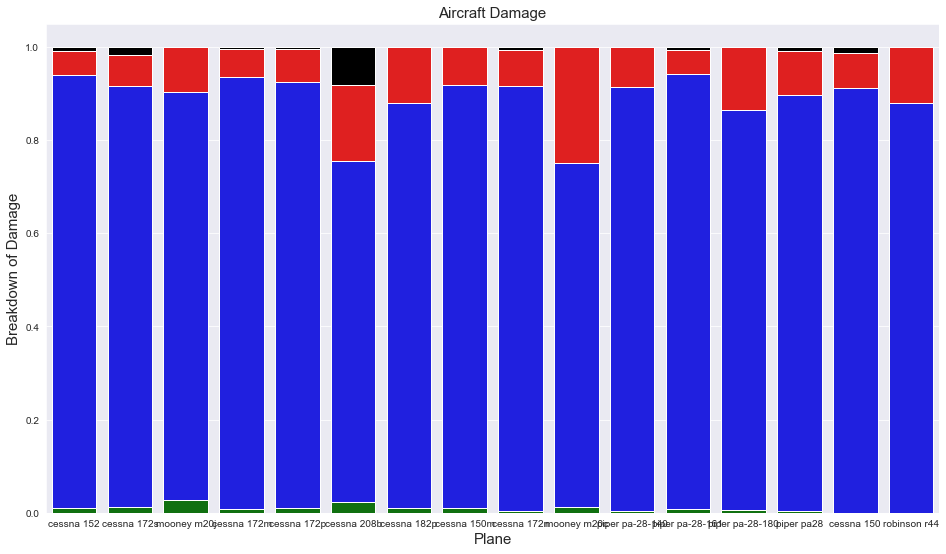

In [18]:
#Showing 
fig, ax=plt.subplots(figsize=(16,9))

sns.set_style('darkgrid')

ax.set_title('Aircraft Damage', fontsize=15)
ax.set_xlabel('Plane', fontsize=15)
ax.set_ylabel('Breakdown of Damage', fontsize=15)

f_4=sns.barplot(data=damage_table_safe, x=damage_table_safe.index, y=damage_table_safe['minor']/damage_table_safe['planes']+damage_table_safe['substantial']/damage_table_safe['planes']+damage_table_safe['destroyed']/damage_table_safe['planes']+damage_table_safe['unknown']/damage_table_safe['planes'], color='black')
f_3=sns.barplot(data=damage_table_safe, x=damage_table_safe.index, y=damage_table_safe['minor']/damage_table_safe['planes']+damage_table_safe['substantial']/damage_table_safe['planes']+damage_table_safe['destroyed']/damage_table_safe['planes'], color='red')
f_2=sns.barplot(data=damage_table_safe, x=damage_table_safe.index, y=damage_table_safe['minor']/damage_table_safe['planes']+damage_table_safe['substantial']/damage_table_safe['planes'], color='blue')
f_1=sns.barplot(data=damage_table_safe, x=damage_table_safe.index, y=damage_table_safe['minor']/damage_table_safe['planes'], color='green');

Based on these findings, we would recommend the Beech 1900D and Cessna 185 as the top private planes for mitigating risk. These planes rank among the safest in terms of death and injuries. A high percentage of Beech 1900D planes which crashed experiences only minor damage. As for the Cessna 185, most planes which crashed did experiences substantial damage but very few were destroyed compared to the other planes in this chart.

---

## **Commercial Plane Risk Assessment**

In [19]:
df.isna().sum()

location                    0
investigation_type          0
event_date                  0
country                     0
injury_severity             0
aircraft_category           0
make                        0
model                       0
number_of_engines           0
engine_type                 0
total_fatal_injuries        0
total_uninjured             0
total_serious_injuries      0
total_minor_injuries        0
latitude                  423
longitude                 431
amateur_built               0
aircraft_damage           493
city                        0
state                       0
region                    149
passengers                  0
dtype: int64

The second portin will asses what Commerical plane....


We will start by examining the number_of_engines in the dataset

In [20]:
commercial_df = df

The most common commercial plane manufacturers are:

- boeing
- airbus
- embraer
- mcdonnell douglas (now owned by boeing)
- bombardier

In [21]:
## Research:
# Reciprocating = Yes; some are / aren't
# Turbo Prop = No
# Turbo Fan = Yes; some are / aren't
# Delete: Unknown, Turbo Shaft, Electric, UNK


# Identifying which **engine_type** is used for commercial planes and filtering accordingly:
#Only using **Reciprocating** and **Turbo Fan**:
commercial_df = commercial_df[(commercial_df['engine_type'] == 'reciprocating') | (commercial_df['engine_type'] == 'turbo fan')]
commercial_df['engine_type'].value_counts()

# Filtering to planes with 2 or more engines:
commercial_df = commercial_df[commercial_df['number_of_engines'] >= 2]
commercial_df['number_of_engines'].value_counts()

# Top US mnaufacters of Commercial Planes
commercial_manufacturers = [
    "airbus",
    "boeing",
    "embraer",
    "comac",
    "atr",
    "mcdonnell douglas",
    "mcdonnell",
    "tupolev",
    "ilyushin",
]

# Filtering dataframe to Commercial Planes only
make = commercial_df['make'].isin(commercial_manufacturers)
filtered_df = commercial_df[make]
filtered_df['make'].value_counts()
commercial_df = commercial_df[commercial_df['make'].isin(commercial_manufacturers)]


# confirming all of the 'models' are indeed commercial planes:
not_commercial = ['a75', 'a75n1', 'b75n1', 'a75n1(pt17)', 'a75n1 (pt17)', 'b75', 'e75', 'b17', 'emb-500', 'pt 17', 'n2s-3', 'a 75n1', 'a75n-1', 'd75n1', 'b-17g']

# the ~ in front of df is a negation operator to 
# do the opposite of the following action:
commercial_df = commercial_df[~commercial_df['model'].isin(not_commercial)]
commercial_df['model'].value_counts()

737               21
737-7h4           16
737 7h4           15
emb-145lr         15
757               11
                  ..
777-200er          1
erj 170-200 lr     1
737 924            1
737 7l9            1
737-824            1
Name: model, Length: 207, dtype: int64

Determining which models have had the most accident/incidents and if they were fatal/non-fatal:

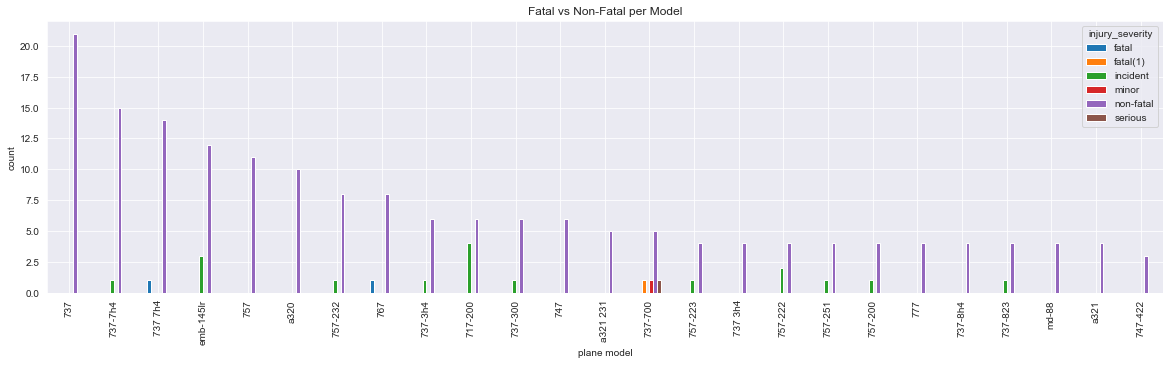

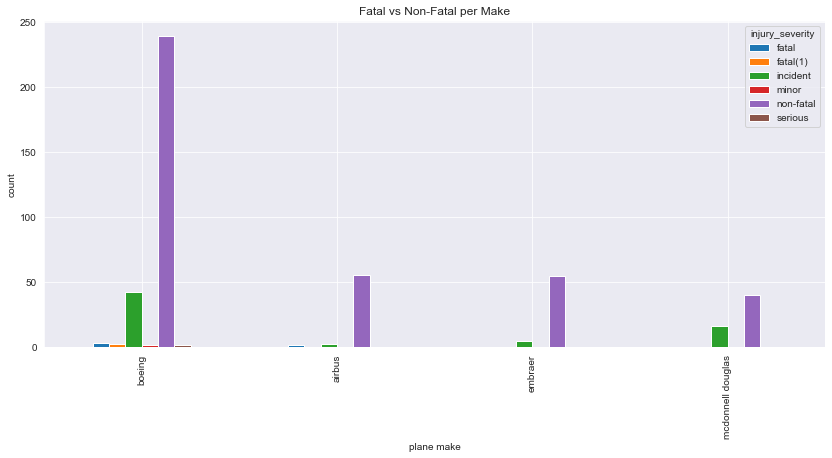

In [22]:
#
grouped_1 = commercial_df.groupby(['model', 'injury_severity']).size().unstack().sort_values(by='non-fatal', ascending=False).head(25)
grouped_1.plot(kind='bar', stacked=False, figsize=(20,5))
plt.xlabel('plane model')
plt.ylabel('count')
plt.title('Fatal vs Non-Fatal per Model')

plt.show()

#
grouped_2 = commercial_df.groupby(['make', 'injury_severity']).size().unstack().sort_values(by='non-fatal', ascending=False).head(25)
grouped_2.plot(kind='bar', stacked=False, figsize=(14,6))
plt.xlabel('plane make')
plt.ylabel('count')
plt.title('Fatal vs Non-Fatal per Make')
plt.show()

In [23]:
commercial_df.loc[commercial_df['injury_severity'] == 'fatal']

,location,investigation_type,event_date,country,injury_severity,aircraft_category,make,model,number_of_engines,engine_type,...,total_serious_injuries,total_minor_injuries,latitude,longitude,amateur_built,aircraft_damage,city,state,region,passengers
74008,"san francisco, ca",accident,2013-07-06,united states,fatal,airplane,boeing,777-200er,2.0,turbo fan,...,137.0,50.0,373648N,1222150W,no,Destroyed,san francisco,ca,West,240.0
74252,"birmingham, al",accident,2013-08-14,united states,fatal,airplane,airbus,a300 - f4 622r,2.0,turbo fan,...,0.0,0.0,333350N,0086488W,no,Destroyed,birmingham,al,South,2.0
82061,"philadelphia, pa",accident,2018-04-17,united states,fatal,airplane,boeing,737 7h4,2.0,turbo fan,...,125.0,8.0,395219N,0751424W,no,Substantial,philadelphia,pa,North East,142.0
83727,"trinity bay, tx",accident,2019-02-23,united states,fatal,airplane,boeing,767,2.0,turbo fan,...,0.0,0.0,294612N,0943936W,no,Destroyed,trinity bay,tx,South,3.0


### **Fatal Accident Context:**
1.) boeing 777-200er (2013-07-06):
- .Pilot error; upon landing.
- .documentation: https://aviation-safety.net/database/record.php?id=20130706-0



2.) airbus a300 - f4 622r (2013-08-14):
- .Pilot error; failure to properly configure and verify the flight management computer for the profile approach
- .documentation: https://aviation-safety.net/database/record.php?id=20130814-0



3.) boeing 737 7h4 (2018-04-17):
- metal fatigue in the area where the blade broke in the engine.
- documentation: https://aviation-safety.net/database/record.php?id=20180417-0



4.) boeing 767 (2019-02-23):
- .Pilot error; inappropriate response by the first officer as the pilot flying to an inadvertent activation of the go-around mode, which led to his spatial disorientation.
- .documentation: https://aviation-safety.net/database/record.php?id=20190223-0

---

## **Operation Location Risk Assessment**

For our location analysis we will want to look at the accident data for each region in regards to the top private aircraft and top commerical aircraft

First we assign each state to its corresponding region so that we can visualize the accident data 

In [24]:
#Only including the 50 United States
df[df['state'].isin(state_region_dict.keys())]

private_planes = df.loc[df['passengers'] <20]

# Group the data by state and sum the total injuries for private planes
injuries_by_state_south = private_planes[private_planes['region'] == 'South'].groupby('state')[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()
injuries_by_state_west = private_planes[private_planes['region'] == 'West'].groupby('state')[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()
injuries_by_state_northeast = private_planes[private_planes['region'] == 'North East'].groupby('state')[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()
injuries_by_state_midwest =  private_planes[private_planes['region'] == 'Midwest'].groupby('state')[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()

# Group the data by state and sum the total injuries for commercial planes
commercial_injuries_by_state_south = commercial_df[commercial_df['region'] == 'South'].groupby('state')[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()
commercial_injuries_by_state_west = commercial_df[commercial_df['region'] == 'West'].groupby('state')[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()
commercial_injuries_by_state_northeast = commercial_df[commercial_df['region'] == 'North East'].groupby('state')[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()
commercial_injuries_by_state_midwest =  commercial_df[commercial_df['region'] == 'Midwest'].groupby('state')[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()

### **Visualizations**

We start with commerical aircraft data to visualize the amount of accidents and incidents of the top 10 states. then we seperate accidnet and incident and view the counts

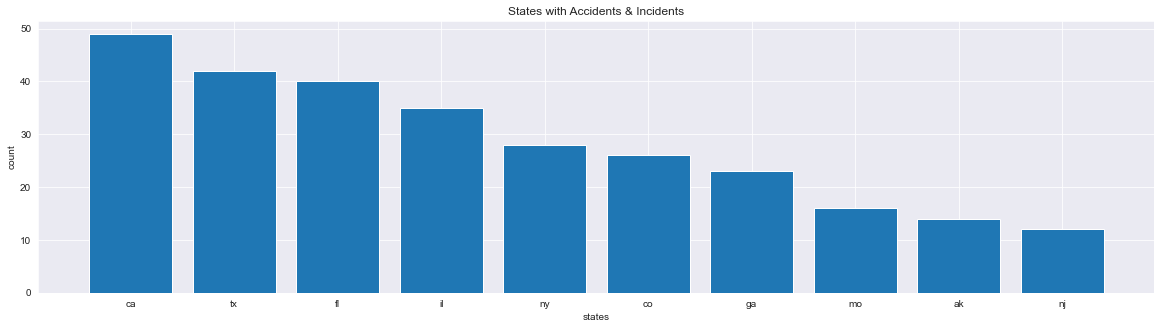

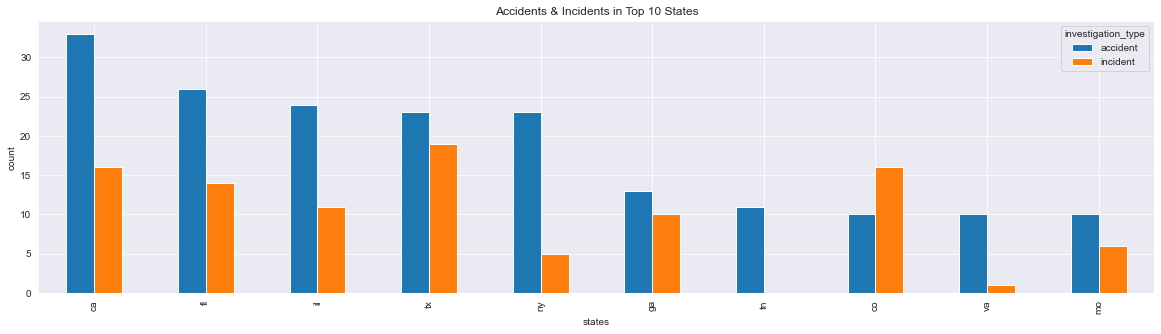

In [25]:
#Identifying which states have the highest amount of Accidents/Incidents:
counts = commercial_df['state'].value_counts().sort_values(ascending=False).head(10)
x = counts.index
y = counts.values

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(x, y)
plt.xlabel('states')
plt.ylabel('count')
plt.title('States with Accidents & Incidents')
plt.show()

#Top 10 States & whether there was an accident VS incident:
grouped_1 = commercial_df.groupby(['state', 'investigation_type']).size().unstack().sort_values(by='accident', ascending=False).head(10)
grouped_1.plot(kind='bar', stacked=False, figsize=(20,5))
plt.xlabel('states')
plt.ylabel('count')
plt.title('Accidents & Incidents in Top 10 States')

plt.show()

Next we will look at the injury data by state/region for commerical aircraft

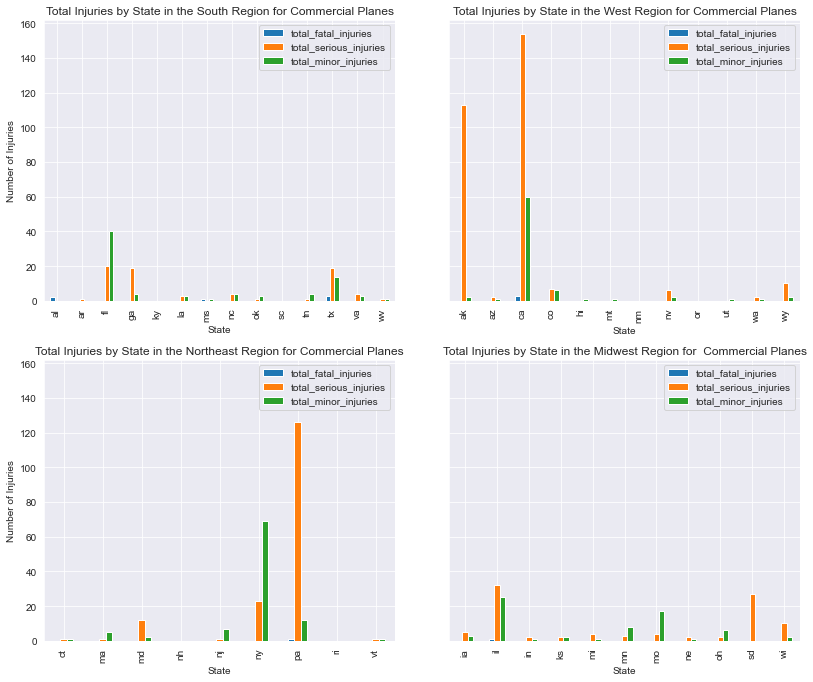

In [26]:
# Set the figure size and layout
fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
fig.tight_layout(pad=4.0)

# Create a bar chart of the total injuries by state for commercial planes
commercial_injuries_by_state_south.plot(kind='bar', ax=ax[0,0])
ax[0,0].set_title('Total Injuries by State in the South Region for Commercial Planes')
ax[0,0].set_xlabel('State')
ax[0,0].set_ylabel('Number of Injuries')

commercial_injuries_by_state_west.plot(kind='bar', ax=ax[0,1])
ax[0,1].set_title('Total Injuries by State in the West Region for Commercial Planes')
ax[0,1].set_xlabel('State')
ax[0,1].set_ylabel('Number of Injuries')

commercial_injuries_by_state_northeast.plot(kind='bar', ax=ax[1,0])
ax[1,0].set_title('Total Injuries by State in the Northeast Region for Commercial Planes')
ax[1,0].set_xlabel('State')
ax[1,0].set_ylabel('Number of Injuries')

commercial_injuries_by_state_midwest.plot(kind='bar', ax=ax[1,1])
ax[1,1].set_title('Total Injuries by State in the Midwest Region for  Commercial Planes')
ax[1,1].set_xlabel('State')
ax[1,1].set_ylabel('Number of Injuries')

plt.show()

From our analysis of commercial aircraft and injury total we would recommend the South and Midwest Region

Next, we will look at the total injuries by state/region for private aircraft

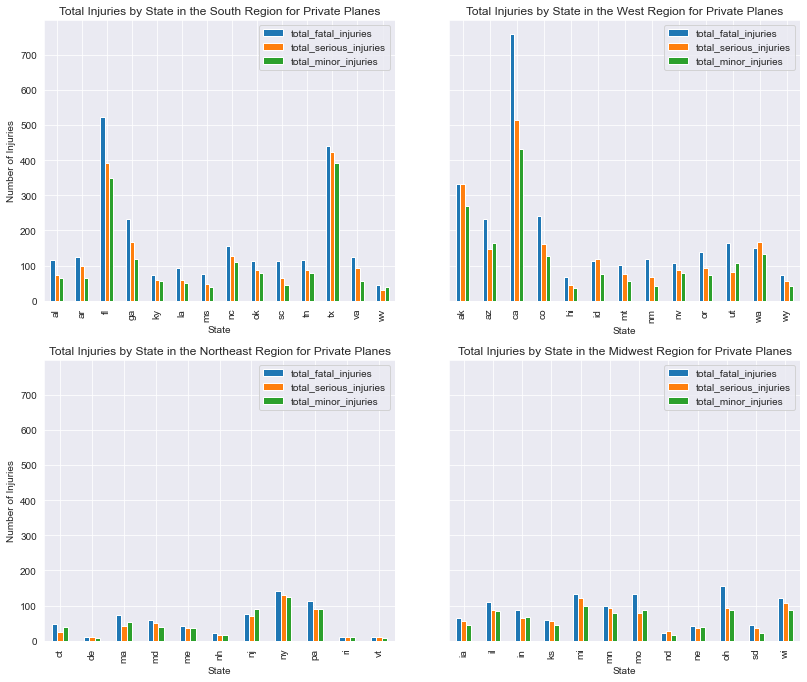

In [27]:
# Set the figure size and layout
fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
fig.tight_layout(pad=4.0)

# Create a bar chart of the total injuries by state for private planes
injuries_by_state_south.plot(kind='bar', ax=ax[0,0])
ax[0,0].set_title('Total Injuries by State in the South Region for Private Planes')
ax[0,0].set_xlabel('State')
ax[0,0].set_ylabel('Number of Injuries')

injuries_by_state_west.plot(kind='bar', ax=ax[0,1])
ax[0,1].set_title('Total Injuries by State in the West Region for Private Planes')
ax[0,1].set_xlabel('State')
ax[0,1].set_ylabel('Number of Injuries')

injuries_by_state_northeast.plot(kind='bar', ax=ax[1,0])
ax[1,0].set_title('Total Injuries by State in the Northeast Region for Private Planes')
ax[1,0].set_xlabel('State')
ax[1,0].set_ylabel('Number of Injuries')

injuries_by_state_midwest.plot(kind='bar', ax=ax[1,1])
ax[1,1].set_title('Total Injuries by State in the Midwest Region for Private Planes')
ax[1,1].set_xlabel('State')
ax[1,1].set_ylabel('Number of Injuries')

plt.show()

From our analysis we see the majority of fatalities occur in Private planes. The lowest risk locations for private planes would be the Northeast, followed by the Midwest region.

geolocator = Nominatim(user_agent="my_app")

# define a function to get the latitude and longitude of each city/state location
def get_lat_long(location):
    try:
        location = geolocator.geocode(location)
        return location.latitude, location.longitude
    except:
        return None, None

# fill null values in latitude and longitude with its corresponding city and state
df['latitude'] = df.apply(lambda row: get_lat_long(row['city'] + ', ' + row['state'])[0] if pd.isnull(row['latitude']) else row['latitude'], axis=1)
df['longitude'] = df.apply(lambda row: get_lat_long(row['city'] + ', ' + row['state'])[1] if pd.isnull(row['longitude']) else row['longitude'], axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23335 entries, 51802 to 90226
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   location                23335 non-null  object        
 1   investigation_type      23335 non-null  object        
 2   event_date              23335 non-null  datetime64[ns]
 3   country                 23335 non-null  object        
 4   injury_severity         23335 non-null  object        
 5   aircraft_category       23335 non-null  object        
 6   make                    23335 non-null  object        
 7   model                   23335 non-null  object        
 8   number_of_engines       23335 non-null  float64       
 9   engine_type             23335 non-null  object        
 10  total_fatal_injuries    23335 non-null  float64       
 11  total_uninjured         23335 non-null  float64       
 12  total_serious_injuries  23335 non-null  fl

## **Conclusions**

In [29]:
df.to_csv('peanut_butter_inc.csv', index=False)